# 15. Generalised Linear Models: Poisson Regression for Count Variables

In this session we explore Poisson regression models, which are used when the outcome of interest is a count variable.

<div class="alert alert-block alert-warning">
<b> Intended learning outcomes</b> 
    
By the end of this session, you will be able to: 

* explain what discrete data is and when it may be present in health data science;
* describe the Poisson regression model;
* apply the Poisson regression model to analyse data and evaluate the findings;
* describe other health data science methods suitable to model count data when Poisson regression is not appropriate. 
</div>

## 15.1 Introduction to Count Data and Poisson Distribution:

### 15.1.1 Introduction to Count Data

Quantitative data can be divided generally into two sub groups: continuous and discrete. Discrete data typically involves integers which cannot be made with greater precision, for example, the number of operations a patient has undergone cannot have divisible entities i.e. 2.8 operations makes no sense. However, continuous data can have non integers which can be increased in precision for example a volume of liquid could be recorded in litres, mililitres, millimillilitre and so on. 

Count data is a discrete data type which can only take non-negative integer values, for example {0, 1, 2, 3, ...}. These integers should arise from counting and not ranking. Count data is common in health data, for example the number of readmissions to hospital a person has would be classed as count data.

When count data is treated as a random variable where possible values represent the possible outcomes of say a future experiment, then count data can be modelled by the Poisson, binomial and negative binomial distributions. This section only focuses on using the Poisson distribution, however briefly to cover how the other two distribution can be used if we think of clinical trials as a dichotomised variable defined as success or fail then:

•	Binomial distribution can be used to describe the count of successful trials achieved in a total number of trials, given a constant probability of success.

•	Negative binomial distribution can be used to describe the count of successful trials until observing a defined number of failures, given a constant probability of success.

### 15.1.2 Why can't we just use Ordinary Linear Regression?

One of the main assumptions required for fitting an ordinary linear regression (OLR) is that the residual errors must follow a normal distribution. For this to be achieved with data from a skewed distribution, a transformation must be applied however with discrete data this can be very problematic (making the interpretation of the findings unfeasibly difficult) or impossible (for example, a high number of 0’s could prevent normality from being achieved). Another issue is that an OLR has the ability to create negative predicted values which would be theoretically impossible. For these reasons it is better to apply a method which actually reflects the natural distribution instead of trying to make the distribution reflect the method. This is why a Poisson regression is generally more suited to count data than OLR.

### 15.1.3 Poisson Distribution Recap
#### 15.1.3.1 What is the Poisson Distribution

The Poisson distribution was first published by Siméon Denis Poisson in 1838. Poisson was a French mathematician, engineer, and physicist, his name is one of 72 engraved on the Eiffel Tower in Paris. The Poisson distribution is a skewed, discrete distribution restricted to non-negative numbers. The shape of the distribution is defined by the shape parameter $\lambda$ which represents the average number of events in the given time interval. As $\lambda$ increases the distribution looks more and more like the normal distribution. When $\lambda$ is about 10 or greater, then a normal distribution is a good approximation. 

Please play with changing lambda ($\lambda$) in the example below to discover its effects on the shape of the distribution:


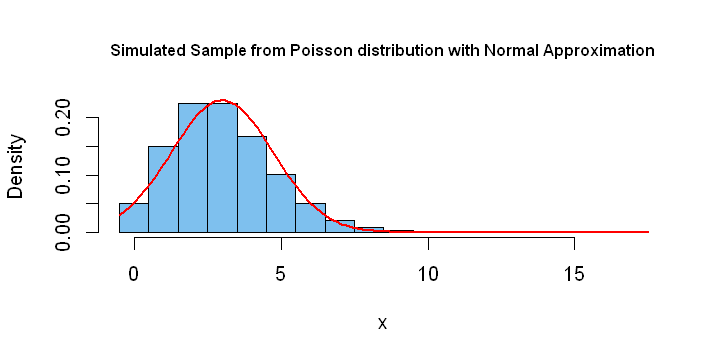

In [1]:
options(repr.plot.width=6, repr.plot.height=3)
options(warn=-1)

#Number of data points
n<-10^6
#Lambda is the shape parameter which indicates the average number of events in the given time interval.
#Please try different values.
lambda<- 3

#Simulate Sample
y = rpois(n, lambda);  up=max(y)

#Plot histogram 
hist(y, prob=T, br=(-1:up)+.5, col="skyblue2", xlab="x", 
  main="Simulated Sample from Poisson distribution with Normal Approximation", cex.main=0.8)
curve(dnorm(x, mean(y), sd(y)), col="red", lwd=2, add=T)
#dnorm here is creating the PDF for a normal distribution to plot on the graph. 

#### 15.1.3.2 Rules for using the Poisson!

-	There should not be a limit for how any times an event can occur during a time period. 

  - For example, if there was a rule that a participant can only have two hospital appointments in a year, then the resulting counts for all participants would not be a Poisson distribution.
    
-	Events must occur independently. If an event occurs, then it should not affect the probability of another event occurring in the same period.

  - For example, if a participant has a hospital appointment in which they are told they must come back 5 more times in the year. 

-	The average rate of events occurring should be constant and not affected by time. 

  - For example, if the participants are not allowed to have hospital appointments in the first 11 months of a year.

-	The probability of an event occurring is proportional to the length of the time period being examined. 

  - For example, a participant should be twice as likely to have an appointment in 2 months compared to 1 month. 

- Two events cannot occur at exactly the same instant. 

  - For example, a participant cannot have two appointments at the same time. 

#### 15.1.3.3 Poisson Distribution Characteristics

General Characteristics:
- Mean: $\mu$ = $\lambda$
- Variance: $\lambda$
- Range: 0 to $\infty$
- Standard Deviation:  $\sqrt{ \lambda}$
- Coefficient of Variation:	$\frac{1}{\sqrt{ \lambda}}$

To determine the distribution of a discrete random variable we can either provide its Probability Mass Function (PMF) or Cumulative Density Function (CDF).

The formal definition of a **PMF** is it is a function over the sample space of a discrete random variable $X$ which gives the probability that $x$ is equal to a certain value. In count data terms it means it is a function of the count variable which can return the probability of any count value being observed, i.e. it can give the probability of say participants having 2 hospital appointments in a year. 


If $X$ (a discrete random variable) is assumed to have a Poisson distribution with parameter $\lambda>0$, for counts $x$ = 0,1,2,…, the PMF of $X$ is given by:

$$ f(x; \lambda) = P(X=x) = \frac{\lambda^{x}e^{-\lambda}}{x!}$$

Where $e$ is Euler’s number ($e=2.71$…) and $x!$ is a factorial (i.e. $3!=3x2x1$ and $5!= 5x4x3x2x1$).The positive real number $\lambda$ is equal to the expected value of $X$ and also the expected variance of $X$ (in a Poisson distribution the mean and variance are the same).

The previous graph represents a plot of the Poisson PMF, you can see that as you increase and decrease $\lambda$ the shape of the graph changes.

The formal definition of a **CDF** is it is a function over the sample space of a discrete random variable $X$ which gives the probability that $x$ is less than or equal to a certain value. In count data terms it means it is a function of the count variable which can return the probability of being less than or equal to a count value, i.e. it can give the probability of say participants having less than or equal to 3 hospital appointments in a year. 

$$ f(x; \lambda) = P(X\leq x) = \sum_{i=0}^{x} \frac{\lambda^{i}e^{-\lambda}}{i!}$$

The following graph shows the Poisson cumulative distribution function, please change $\lambda$ to explore the effects:


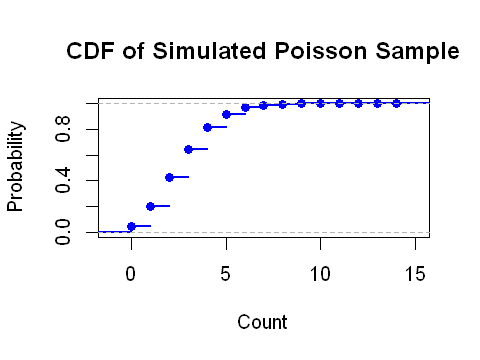

In [2]:
options(repr.plot.width=4, repr.plot.height=3)
#Number of data points
n<-10^6
#Lambda is the shape parameter which indicates the average number of events in the given time interval.
#Please try different values.
lambda<- 3

#Simulate Sample
y = rpois(n, lambda)

#Plot 
plot(ecdf(y), col = "blue", lwd = 2,
     main = "CDF of Simulated Poisson Sample", ylab="Probability", xlab="Count")

## 15.2 Introduction to Poisson generalised linear modelling (Poisson Regression)

### 15.2.1 Brief Introduction to Poisson Regression
Poisson generalised linear modelling is commonly known as Poisson regression but is sometimes referred to as a log-linear model. Poisson regression is the generalised linear model form of a regression analysis. It is fitted to data when the outcome is assumed to have a Poisson distribution. 

Poisson regression assumes the outcome variable has a Poisson distribution and uses a logarithm as the canonical link function. A link function acts as a bridge between a linear predictor and the mean of the distribution function of choice. The canonical link function is basically the “well-defined” link function and is derived from the exponential density function of the distribution.  

Say we want to model $\mathbf{Y}$ using Poisson Regression so $\mathbf{Y} \sim P(\mu)$ and let the mean $\mu$ (and therefore the variance) depend on a vector of explanatory variables $\mathbf{X}$. We will need to take the linear predictor $\mathbf{X}^T\mathbf{\beta}$ and combine it with a link function ($g$) so that the left hand side of the predictor $\mu$ is always non-negative. We include the link function like this:   

$E[\mathbf{Y}|\mathbf{X}] = \mu = g^{-1} (\mathbf{X}^T\mathbf{\beta})$

Similarly the variance of $\mathbf{Y}$ (Var$[\mathbf{Y}]$) is written:

 $ Var[\mathbf{Y}|\mathbf{X}] = Var[\mu] =Var[ g^{-1} (\mathbf{X}^T\mathbf{\beta})]$
 
The canonical link function for Poisson regression is the logarithm, thus:

$ ln(E[\mathbf{Y} | \mathbf{X}]) = ln(\mu) = \mathbf{X}^T\mathbf{\beta}$

Here $\beta$ contains the regression coefficients. An element of $\beta$ represents the expected change in the natural $log$ of the mean per unit change of one explanatory variable in $X$ (constraining the other elements to not change). 

If you wanted to find the expected value of the outcome variable $\mathbf{Y}$ given $\mathbf{X}$ then the equation looks like this:

$ E[\mathbf{Y}|\mathbf{X}]  = \mu = e^{\mathbf{X^T\beta}}$,

where $\mathbf{\beta}$ can be estimated by the maximum likelihood. 


### 15.2.2 Common Problems in Poisson Regression

There are two frequent common problems when applying Poisson Regression to count data and both are caused by the deviations from the Poisson distribution assumptions. The first problem is overdispersion and the second is zero inflation.

### 15.2.3 Overdispersion
Overdispersion happens with then the variance is no longer equal to the mean but larger. Below is an example of overdispersion. 



[1] "The Mean is"


[1] 28.14815

[1] "The Variance is"


[1] 174.2041

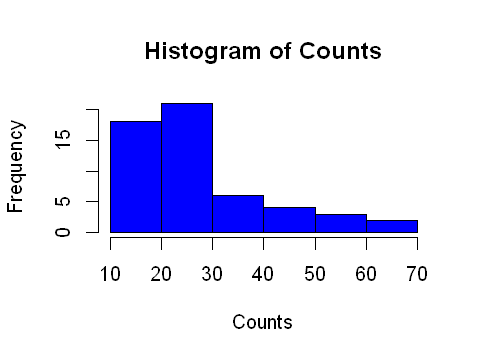

In [3]:
options(repr.plot.width=4, repr.plot.height=3)
#Input some counts
data<- c(26,30,54,25,70,52,51,26,67,18,21,29,17,12,18,35,30,36,36,21,24,18,10,43,28,15,26,27,14,29,19,29,31,41,20,44,42,26,19,16,39,28,21,39,29,20,21,24,17,13,15,15,16,28)
#Histogram of counts
hist(data, xlab="Counts", main="Histogram of Counts", col="blue")
#Mean
print("The Mean is")
mean(data)
#Variance
print("The Variance is")
var(data)
# The mean is a lot smaller than the variance, suggesting overdispersion


We can see here that the variance is a lot larger than the mean which would violate the Poisson distribution principles. There are two main ways to handle overdispersion, the first is through using a negative binomial distribution (not covered here) instead and the second is to implement something called a quasi-likelihood through a Generalised Poisson Regression also called a Quasi-Poisson regression.

### 15.2.4 Quasi-Poisson regression

A Quasi-Poisson regression is often fitted to handle over-dispersion, it uses the same mean regression function and variance function from Poisson regression but allows the dispersion parameter $\phi$ to be unrestriced from 1. In Poisson regression $\phi$ is assumed to be fixed at 1 to make the mean and variance equal, in Quasi-Poisson regression $\phi$ is not fixed and is estimated from the data. Quasi- Poisson regression leads to the same coefficient estimates as the Poisson regression model but inference are adjusted for the over-dispersion through the standard errors.  

### 15.2.5 Zero inflation
Zero inflation happens when the distribution contains a large number of zero’s. For example, if you were to count how many occasions people drank alcohol in a month but included a large number of non-drinkers you will expect to have multiple counts of 0. A zero inflated Poisson distribution often looks like this:



package 'VGAM' successfully unpacked and MD5 sums checked



The downloaded binary packages are in
	C:\Users\emsuewil\AppData\Local\Temp\Rtmpi6KOCz\downloaded_packages


Loading required package: stats4


Loading required package: splines


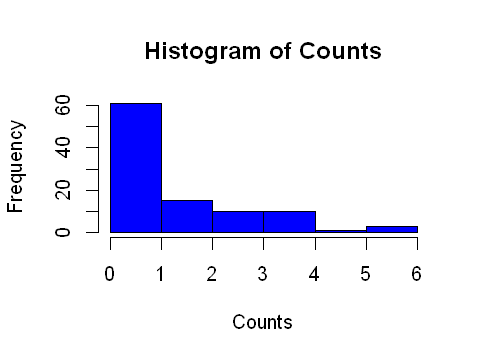

In [4]:
options(repr.plot.width=4, repr.plot.height=3)
#Install package
install.packages("VGAM")
library("VGAM")

#Number of data points to simulate
n=100
#Shape
lambda=3
#Probability of drawing a zero
p=0.5
#Create data
zip<-rzipois(n, lambda = lambda, pstr0 = p)
#Plot Histogram
hist(zip, xlab="Counts", main="Histogram of Counts", col="blue")

A Zero-Inflated Poisson (ZIP) distribution can be thought of being generated by two processes, the first generates zeros and the second is generated by the Poisson distribution (which will contain zeros). The two processes look like this:

$P[\mathbf{Y}=0] = \pi (1-\pi)e^{- \lambda }$,

$P[\mathbf{Y}=k] = (1-\pi)\frac{\lambda^{k}e^{-\lambda}}{k!}$,

Where $k$ is a non-negative integer value, $\lambda$ is the expected Poisson count and $\pi$ is the probability of extra zeros. The mean of a ZIP is $(1-\pi)\lambda$ and the variance is $\lambda (1-\pi) (1+\pi \lambda)$.

When fitting a ZIP regression the software package combines two parts, a Poisson regression and logistic regression to predict the excess zeros.


## 15.3 Poisson regression in health data science

Poisson regression in of limted use in health data science due to the constraint that the mean and variance need to be the same. This is a characteristic which is often not adhered to in real data sets and usually a data scientist turns to other methods, for example negative binomial regression or generalised Poisson regression. Also when the expected counts (lambda) is large (which often arises in health data science) a normal approximation of the distribution will often give equivocal results. However, it is very important to understand Poisson regression if you are planning on doing health data science on rare events as it will increase the likelihood that a Poisson distribution is observed.


## 15.4 How to fit a Poisson Regression in R

Similarly to other generalised linear regressions, we fit a Poisson regression through the generalised linear models function glm() where we tell R what the distribution of the errors and linear predictor should be.

You should already be familiar with the glm() function but a quick recap the function syntax is as followed:

    glm(formula, family = gaussian, data, weights, subset,
    na.action, start = NULL, etastart, mustart, offset,
    control = list(…), model = TRUE, method = "glm.fit",
    x = FALSE, y = TRUE, singular.ok = TRUE, contrasts = NULL, …)
    
The minimal inputted parameters required is the *formula* and the *family*. The *formula* tells R in a symbolic description what model is required to be fitted and the *family* describes what error distribution and link function are required. As we are going to be fitting Poisson regression the *family* will be “poisson”, however we can also fit a Quasi-Poisson regression also by setting *family* to "quasipoisson".



### 15.4.1 Data for Poisson Regression Example

For the purpose of illustration, we will simulate some data and pretend it comes from a clinical trial. We generate 100 participants ($n$) in three variables. The first is a count variable representing the number of hospital admissions a participant has had in a year and it is created from a Poisson distribution with $lambda=2$. The second is a categorical variable with 4 groups representing the country a participant lives in (England, Northern Ireland, Scotland, Wales) and the last is a binary variable representing which treatment arm the participant was randomised to. Let’s start with simulating the data and looking at some descriptive statistics.


In [5]:
## Simulate Data
set.seed(42)
n<-100
lambda<-6
counts <- rpois(n, lambda)
country <-  factor(sample(1:4, n, replace=T), levels=1:4, labels=c("England","Northern Ireland","Scotland","Wales"))
treatment <- factor(gl(2,n/2), levels=1:2, labels=c("Active Arm", "Placebo Arm"))
print(df <- data.frame(treatment, country, counts))
summary(df)  


      treatment          country counts
1    Active Arm Northern Ireland      9
2    Active Arm            Wales     10
3    Active Arm          England      5
4    Active Arm Northern Ireland      8
5    Active Arm          England      7
6    Active Arm Northern Ireland      6
7    Active Arm            Wales      7
8    Active Arm         Scotland      3
9    Active Arm            Wales      7
10   Active Arm          England      7
11   Active Arm            Wales      6
12   Active Arm          England      7
13   Active Arm            Wales     10
14   Active Arm         Scotland      4
15   Active Arm Northern Ireland      6
16   Active Arm Northern Ireland     10
17   Active Arm         Scotland     11
18   Active Arm          England      3
19   Active Arm          England      6
20   Active Arm Northern Ireland      6
21   Active Arm         Scotland      9
22   Active Arm            Wales      3
23   Active Arm            Wales     12
24   Active Arm Northern Ireland     10


       treatment              country       counts     
 Active Arm :50   England         :27   Min.   : 0.00  
 Placebo Arm:50   Northern Ireland:31   1st Qu.: 4.00  
                  Scotland        :18   Median : 6.00  
                  Wales           :24   Mean   : 6.14  
                                        3rd Qu.: 8.00  
                                        Max.   :12.00  

We can see that we correctly have 100 participants with 50% in the active arm and 50% in the placebo arm. There is roughly equal number of participants in each country with Northern Ireland having slightly more. The number of hospital admissions ranges from 0 to 6 with the median number of admissions equal to 2.

We can now have a look at the descriptive statistics for admission counts by both treatment and county.

In [6]:
#Counts by treatment
with(df, tapply(counts, treatment, function(x) {
  sprintf("M (SD) = %1.2f (%1.2f)", mean(x), sd(x))
}))
#Counts by country
with(df, tapply(counts, country, function(x) {
  sprintf("M (SD) = %1.2f (%1.2f)", mean(x), sd(x))
}))

Active Arm            Placebo Arm 
"M (SD) = 6.78 (2.70)" "M (SD) = 5.50 (2.46)"

England       Northern Ireland               Scotland 
"M (SD) = 5.74 (1.87)" "M (SD) = 6.48 (2.34)" "M (SD) = 6.39 (3.07)" 
                 Wales 
"M (SD) = 5.96 (3.42)"

We can see that the Active arm has a slightly higher count mean than the Placebo arm and Scotland also has a slightly higher mean count. We can also look at this graphically using the ggplot package.


  There is a binary version available but the source version is later:
        binary source needs_compilation
ggplot2  3.3.3  3.3.5             FALSE



installing the source package 'ggplot2'



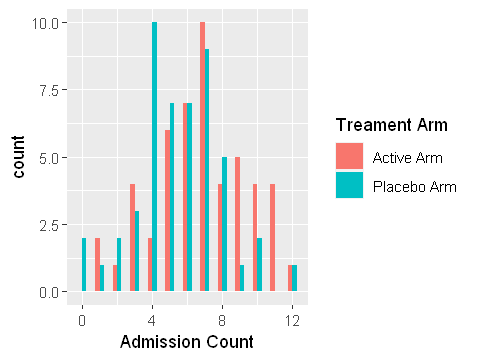

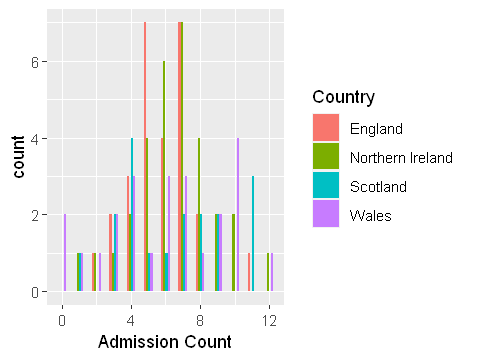

In [7]:
options(repr.plot.width=4, repr.plot.height=3)
install.packages("ggplot2")
library(ggplot2)
g1<-ggplot(df, aes(counts, fill = treatment)) +
  geom_histogram(binwidth=.5, position="dodge")
g1 + labs(fill = "Treament Arm", x="Admission Count")

g2<-ggplot(df, aes(counts, fill = country)) +
  geom_histogram(binwidth=.5, position="dodge")
g2 + labs(fill = "Country", x = "Admission Count")

### 15.4.2 Output from Poisson Regression Example

We already know the admissions count variable follows a Poisson distribution as we have simulated the data directly from the distribution without adding noise. Therefore we know a Poisson regression is suitable. We now fit the regression model and store it in the object m1 and get a summary of the model at the same time.

In [8]:
summary(m1 <- glm(counts ~ treatment + country, family="poisson", data=df))


Call:
glm(formula = counts ~ treatment + country, family = "poisson", 
    data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.2467  -0.5783   0.0477   0.6381   2.2260  

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)              1.82733    0.08448  21.631  < 2e-16 ***
treatmentPlacebo Arm    -0.23187    0.08226  -2.819  0.00482 ** 
countryNorthern Ireland  0.17001    0.10822   1.571  0.11620    
countryScotland          0.14936    0.12396   1.205  0.22822    
countryWales             0.06669    0.11640   0.573  0.56670    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 130.13  on 99  degrees of freedom
Residual deviance: 120.53  on 95  degrees of freedom
AIC: 483.69

Number of Fisher Scoring iterations: 5


**OUTPUT**

The first part of the output gives information on deviance residuals. We would expect to see the deviance residuals to be approximately normally distributed if the model is correctly specified. Here we can see the median is close to 0 (-0.10) and there does not appear to be any skewness as Q1 (quartile 1 = -0.67) and Q3 (quartile 3 = 0.73) have a similar distance from the median and so are the minimum and maximum.

The second part of the output gives the Poisson regression coefficients for each variable with their standard errors, z values, p-values. We interpret Poisson regression coefficients as if there was a one unit change in the predictor variable (if a continuous variable otherwise change from the reference category to the category listed) the regression coefficient tells us the effect on the logs of the expected counts (admission counts in our example), given the other variables in the model are held constant. The coefficient for treatment is -0.40 which tells use the expected log admissions count for being randomised to the active arm compared to the placebo arm is -0.40. The expected log admissions count for the other countries compared to England are all positive. 

We can also see the regression estimate when all the variables in the model are evaluated at zero (or categorical reference group) and this is called the constant and labelled "_cons". In our model this would represent the expected log admissions count for participants in the placebo arm who live in England.

The standard errors are given which are used to calculate the z-value which in turn is used to calculate the p value. The null hypothesis for each p value is that the corresponding regression coefficient is zero given the rest of the variables in the model. The z value here is just the ratio of the coefficient to the standard error for example treatment we can see the estimate/standard error equals the z value: -0.3971/0.1421=-2.795. The z value follows a normal distribution and is tested against a two-sided alternative hypothesis that the coefficient is not equal to zero. We can see for treatment the p value is 0.005 and if we set out alpha significant level at $\alpha=0.05$ we would reject the null hypothesis and conclude the Poisson regression coefficient for treatment is statistically different from zero, given country is in the model. 

Lastly, at the bottom of the output, we have information on the residual deviance which can be used to perform a goodness of fit test for the overall model. We will come back to this in section 14.5.4.


### 15.4.3 Creating robust standard errors from Poisson regression example output.

As previously covered in section 14.2.3.3, the mean of the Poisson distribution is equal to the variance. A publication here (https://onlinelibrary.wiley.com/doi/full/10.1111/1475-4932.12006) recommends using robust standard errors when this assumption is mildly violated. We can create robust standard errors using the sandwich package in R.


In [9]:
#Robust SE's
install.packages("sandwich")
library(sandwich)
cov <- vcovHC(m1, type="HC0")
se <- sqrt(diag(cov))
robust.SE <- cbind(Estimate= coef(m1), "Robust SE" = se, "Pr(>|z|)" = 2 * pnorm(abs(coef(m1)/se)))
robust.SE



  There is a binary version available but the source version is later:
         binary source needs_compilation
sandwich  3.0-0  3.0-1             FALSE



installing the source package 'sandwich'



,Estimate,Robust SE,Pr(>|z|)
(Intercept),1.82733439,0.06412168,2.000000
treatmentPlacebo Arm,-0.23187287,0.08541705,1.993364
countryNorthern Ireland,0.17000567,0.09156736,1.936635
countryScotland,0.14936415,0.11986847,1.787260
countryWales,0.06668722,0.12436880,1.408183


Here we have the robust standard errors (Robust SE) and the new calculated p values. In this example we see that the robust standard errors are very similar to the previous calculated standard errors, this is because we know the distribution was simulated from a Poisson distribution and hence the mean and variance are approximately the same. However in other settings calculating the robust standard error would lead less bias if the mean and variance were slightly different.  

### 15.4.4 Poisson Regression Goodness of Fit Example

At the bottom of the output we see the null deviance and residual deviance from the model. The residual deviance is 104.71 on 95 degrees of freedom (df). There are 100 observations in our model and 5 estimates which gives us 95 df (100-1df for treatment- 3df for each country – 1df for the constant) . To calculate the p-value for the deviance goodness of fit test we simply calculate the probability to the right of the deviance value for the chi-squared distribution on 95 df.


In [10]:
pchisq(m1$deviance, df=m1$df.residual, lower.tail=FALSE)

[1] 0.03956079

The null hypothesis is that our model is correctly specified. Here we can see the p value is 0.233 which is not significant if we set our level of significant at 0.05. We therefore do not have strong evidence to reject the null hypothesis. If however there was strong evidence that the model was not fitting well, a possible method to improve fit could be to omit a variable from the model which could be adversely affecting the linearity or dispersion criteria. For example we could fit an alternative model where we remove country.

In [11]:
# Update m1 model dropping country
m2 <- update(m1, . ~ . - country)
# Test models with chi square test
anova(m2, m1, test="Chisq")


Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
98,123.4508,NA,NA,NA
95,120.5336,3,2.917207,0.4045671


We can see by the non-significant p value of 0.598 that by adding Country to the model we do not get an improve fit and thus the model would fit approximately as well without it. 

### 15.4.5 Poisson Regression Example used for Prediction

One of the great things about regression is it can be used to make predictions, for example we may want to predict what the expected admissions counts would be for each country while assuming everyone is in the placebo treatment. To have a look how this will work we create a small dataset.


In [12]:
dp <- data.frame(treatment = factor(1, levels=1, labels=c("Placebo Arm")), country = factor(1:4, levels = 1:4, labels = levels(df$country)))
dp

treatment,country
Placebo Arm,England
Placebo Arm,Northern Ireland
Placebo Arm,Scotland
Placebo Arm,Wales


We now use the output from the regression to predict the admissions counts for each country.

In [13]:
predict(m1, dp, type="response", se.fit=TRUE)

$fit
       1        2        3        4 
4.930604 5.844302 5.724903 5.270624 

$se.fit
        1         2         3         4 
0.4830472 0.4716294 0.5838867 0.5027216 

$residual.scale
[1] 1

In the output we can see the predicted number of admissions counts for each country assuming everyone is taking placebo treatment. Scotland has the highest predicted count with England having the lowest. We can also graphically show predictions for different permutations of data.

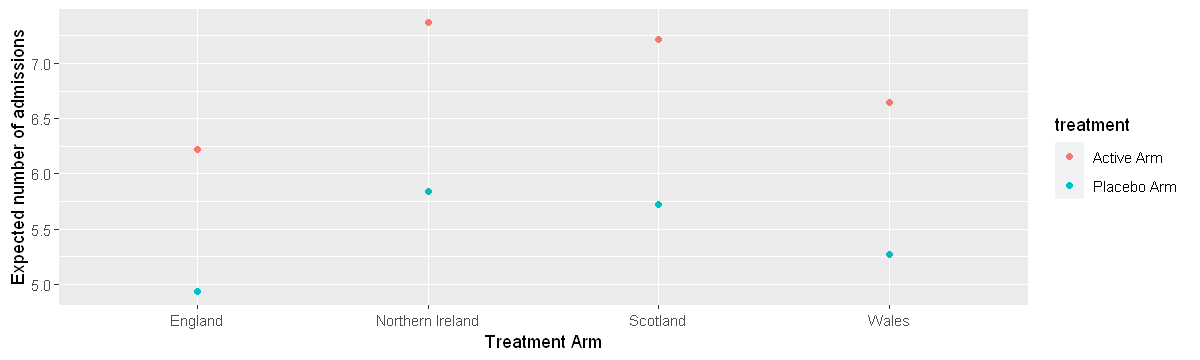

In [14]:
options(repr.plot.width=10, repr.plot.height=3)
## Calculate and store predicted values
df$pred <- predict(m1, type="response")

# Create the plot
ggplot(df, aes(x = country, y = pred, colour = treatment)) +
  geom_point(aes(y = pred)) + labs(x = "Treatment Arm", y = "Expected number of admissions")


Here we can see graphically the predicted admissions count for each country for each treatment arm, to have the lowest predicted number of hospital admissions you would want to be living in England and in the Placebo arm.

## 15.5 Zero Inflated Poisson Regression Example 

As we discussed in section 14.3.4, often we are faced with a distribution which is looks like a Poisson distribution but has an inflated zero count. In this situation Poisson Regression would not be suitable however we can fit a Zero Inflated Poisson Regression, unfortunately the glm() function is incapable of this modelling approach so we need different package called pscl.

Below we simulate data using a similar example to section 14.5.1 but instead of hospital admissions count we are interested in number of alcoholic drinks drunk in a day (treatment and country remain the same). The count for alcoholic drinks has a large number of zeros and thus is suitable to model with a Zero Inflated Poisson Regression.


In [15]:
#Install package
#install.packages("VGAM")
#install.packages("pscl")
library("VGAM")
library(pscl)

#Number of data points to simulate
n=100
#Shape
lambda=3
#Probability of drawing a zero
p=0.5
#Create data
alcohol_count<-rzipois(n, lambda = lambda, pstr0 = p)
country <-  factor(sample(1:4, n, replace=T), levels=1:4, labels=c("England","Northern Ireland","Scotland","Wales"))
treatment <- factor(gl(2,n/2), levels=1:2, labels=c("Placebo Arm","Active Arm"))
print(df <- data.frame(treatment, country, alcohol_count))
summary(df)
summary(m1 <- zeroinfl(alcohol_count ~ country + treatment, data = df))

Classes and Methods for R developed in the
Political Science Computational Laboratory
Department of Political Science
Stanford University
Simon Jackman
hurdle and zeroinfl functions by Achim Zeileis


      treatment          country alcohol_count
1   Placebo Arm          England             4
2   Placebo Arm            Wales             0
3   Placebo Arm Northern Ireland             4
4   Placebo Arm            Wales             0
5   Placebo Arm          England             0
6   Placebo Arm          England             0
7   Placebo Arm Northern Ireland             6
8   Placebo Arm         Scotland             0
9   Placebo Arm          England             0
10  Placebo Arm Northern Ireland             0
11  Placebo Arm Northern Ireland             1
12  Placebo Arm Northern Ireland             2
13  Placebo Arm Northern Ireland             0
14  Placebo Arm            Wales             0
15  Placebo Arm         Scotland             0
16  Placebo Arm Northern Ireland             4
17  Placebo Arm         Scotland             1
18  Placebo Arm Northern Ireland             0
19  Placebo Arm          England             1
20  Placebo Arm          England             4
21  Placebo A

       treatment              country   alcohol_count 
 Placebo Arm:50   England         :26   Min.   :0.00  
 Active Arm :50   Northern Ireland:34   1st Qu.:0.00  
                  Scotland        :26   Median :0.00  
                  Wales           :14   Mean   :1.14  
                                        3rd Qu.:2.00  
                                        Max.   :8.00  


Call:
zeroinfl(formula = alcohol_count ~ country + treatment, data = df)

Pearson residuals:
    Min      1Q  Median      3Q     Max 
-0.7880 -0.7227 -0.4582  0.4130  4.6787 

Count model coefficients (poisson with log link):
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)              1.03937    0.24093   4.314  1.6e-05 ***
countryNorthern Ireland  0.12880    0.24890   0.517    0.605    
countryScotland         -0.40356    0.37120  -1.087    0.277    
countryWales             0.08974    0.39442   0.228    0.820    
treatmentActive Arm      0.09866    0.22040   0.448    0.654    

Zero-inflation model coefficients (binomial with logit link):
                        Estimate Std. Error z value Pr(>|z|)
(Intercept)               0.1425     0.4828   0.295    0.768
countryNorthern Ireland  -0.1511     0.5520  -0.274    0.784
countryScotland           0.7827     0.6597   1.186    0.235
countryWales              1.0468     0.7850   1.333    0.182
treatmentActive

The model fits a glm with a binomial logit link to predict the excess zeros and a glm with a Possion log link to model the rest of the distribution. In both models the variables (country and treatment) have been included however you could use different variables in the two models. Unfortunately the models do not combine the estimates from each model however we can use the coefficients to make predictions.

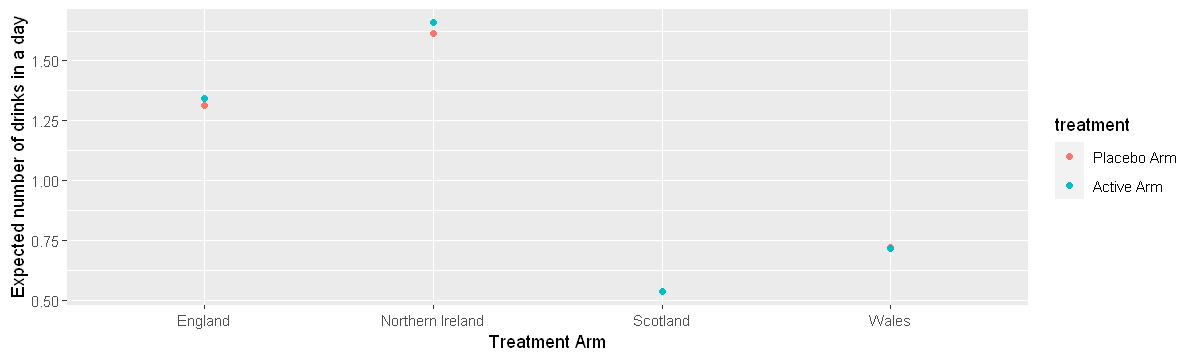

In [16]:
df$pred <- predict(m1, type="response")
# Create the plot
ggplot(df, aes(x = country, y = pred, colour = treatment)) +
  geom_point(aes(y = pred)) +
  labs(x = "Treatment Arm", y = "Expected number of drinks in a day")

The graph shows the expected number of drinks in a day for each country and treatment group, from this we would expect the most number of drinks to be drunk in a day to be for people in the Placebo arm living in Wales, with the fewest from the Active arm people living in Northern Ireland.

To check if the zero inflated Poisson regression models the data better than the straight forward  Poisson regression we can run a Vuong test. A Vuong test is a likelihood ratio test used for model selection when the models are nested, non-nested or overlapping. The null hypothesis is that the two models supplied are equally close to the true data generation structure, against the alternative that one model is closer. To run a Vuong test in R we simple use the vuong() function and supply the two models we wish to compare in our case it is the zero inflated Poisson verses the Poisson model.


In [17]:
#Zero inflated model
summary(m1 <- zeroinfl(alcohol_count ~ treatment + country , data = df))
#Poisson regression
summary(m2 <- glm(alcohol_count ~ treatment + country, family="poisson", data=df))
#Vuong test
vuong(m1, m2)


Call:
zeroinfl(formula = alcohol_count ~ treatment + country, data = df)

Pearson residuals:
    Min      1Q  Median      3Q     Max 
-0.7880 -0.7227 -0.4582  0.4130  4.6787 

Count model coefficients (poisson with log link):
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)              1.03937    0.24093   4.314  1.6e-05 ***
treatmentActive Arm      0.09866    0.22040   0.448    0.654    
countryNorthern Ireland  0.12880    0.24890   0.517    0.605    
countryScotland         -0.40356    0.37120  -1.087    0.277    
countryWales             0.08974    0.39442   0.228    0.820    

Zero-inflation model coefficients (binomial with logit link):
                        Estimate Std. Error z value Pr(>|z|)
(Intercept)               0.1425     0.4828   0.295    0.768
treatmentActive Arm       0.1377     0.4545   0.303    0.762
countryNorthern Ireland  -0.1511     0.5520  -0.274    0.784
countryScotland           0.7827     0.6597   1.186    0.235
countryWales   


Call:
glm(formula = alcohol_count ~ treatment + country, family = "poisson", 
    data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8081  -1.6505  -1.0453   0.5542   4.2552  

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)   
(Intercept)              0.30905    0.19307   1.601  0.10945   
treatmentActive Arm     -0.02373    0.18885  -0.126  0.90000   
countryNorthern Ireland  0.18233    0.21651   0.842  0.39972   
countryScotland         -0.91355    0.31698  -2.882  0.00395 **
countryWales            -0.63542    0.35882  -1.771  0.07658 . 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 270.46  on 99  degrees of freedom
Residual deviance: 250.66  on 95  degrees of freedom
AIC: 364.19

Number of Fisher Scoring iterations: 6


Vuong Non-Nested Hypothesis Test-Statistic: 
(test-statistic is asymptotically distributed N(0,1) under the
 null that the models are indistinguishible)
-------------------------------------------------------------
              Vuong z-statistic             H_A    p-value
Raw                    4.474813 model1 > model2 3.8239e-06
AIC-corrected          3.998462 model1 > model2 3.1878e-05
BIC-corrected          3.377975 model1 > model2 0.00036511


The output shows three z-statistics, the raw, the AIC-corrected and the BIC-corrected. In brief, the AIC (Akaike information criterion) and BIC (Bayesian information criterion) introduce a penalty term to reduce the likelihood of overfitting. When adding parameters to models it is possible to increase the likelihood, the penalty term adjusts for this increase; the penalty term is larger in BIC than in the AIC.

We can see in the output that for all three p values there is significantly strong evidence that model 1, the zero inflated Poisson regression fits the data far better than model 2 the Poisson regression. If however the p values did not agree then the data scientist would have to think about the affects of each method and decide if the raw, AIC or BIC would be the most appropriate in the setting being looked at. There is a debate about the use of Vuong test for this type of comparison, if you wish to read more there is a good paper which can be found here (https://www.sciencedirect.com/science/article/abs/pii/S016517651400490X).
